In [1]:
import zipfile
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(25)

In [2]:
neu_faces = {}
with zipfile.ZipFile("eigenface_dataset.zip", "r") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith("a.jpg"):
            continue # not a face picture
        #with facezip.open(filename) as image:
        image = facezip.read(filename)
        neu_faces[filename] = cv2.imread(filename, 0)

In [3]:
smi_faces = {}
with zipfile.ZipFile("eigenface_dataset.zip", "r") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith("b.jpg"):
            continue # not a face picture
        #with facezip.open(filename) as image:
        image = facezip.read(filename)
        smi_faces[filename] = cv2.imread(filename, 0)

In [4]:
neu_faces = {k: v for k, v in neu_faces.items() if v is not None}
smi_faces = {k: v for k, v in smi_faces.items() if v is not None}

In [5]:
list(neu_faces.keys())[:5]

['upload_dataset/134a.jpg',
 'upload_dataset/7a.jpg',
 'upload_dataset/83a.jpg',
 'upload_dataset/163a.jpg',
 'upload_dataset/175a.jpg']

### Show first 16 faces

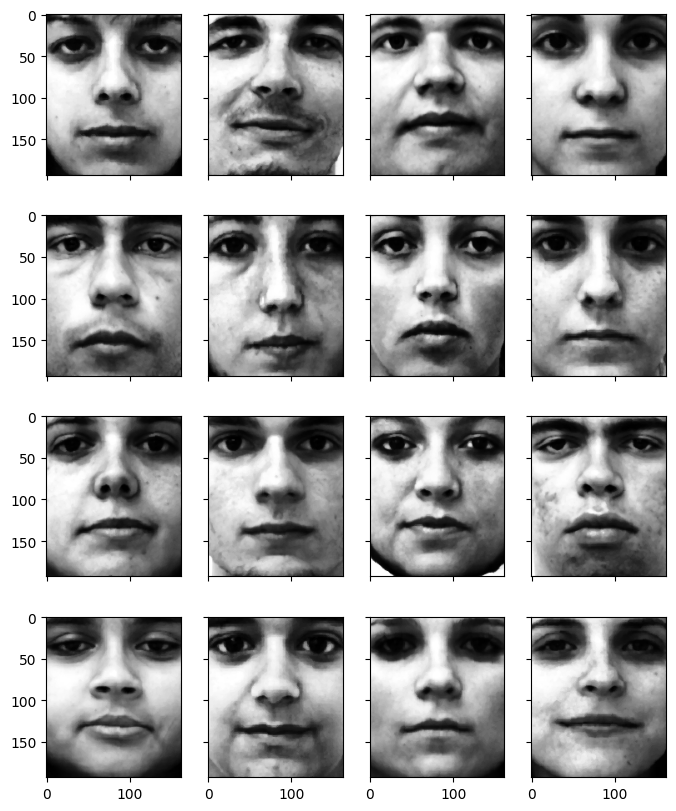

In [6]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
neu_faceimages = list(neu_faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(neu_faceimages[i], cmap="gray")
plt.show()

In [7]:
# get face shape
faceshape = list(neu_faces.values())[0].shape
print(faceshape)

(193, 162)


# Question 1

In [8]:
#select 100 random keys of NEUTRAL FACES
rand_neukeys = random.sample(list(neu_faces),100)
rand_neu = {k: v for k, v in neu_faces.items() if k in rand_neukeys}

In [9]:
avg_list = [np.array(rand_neu[key].flatten().tolist()) for key in rand_neu]

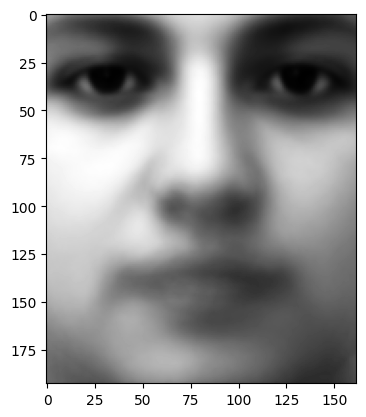

In [10]:
#get the average of the 100 faces
avg_face = np.sum(avg_list, axis=0)/100
show_avg_face = avg_face.reshape(193,162)
plt.imshow(show_avg_face, cmap="gray")
plt.show()
#for each face subtract avg_face

In [11]:
#flatten the neutral faces and subtract by the avg
flat_neu = [np.array(rand_neu[key].flatten().tolist()) for key in rand_neu]
flat_neu = [np.subtract(i, avg_face) for i in flat_neu]

In [12]:
#calculate the covariance with sum neu.T*neu
neu_cov = [i*i.transpose()/100 for i in flat_neu]
print(len(neu_cov))

100


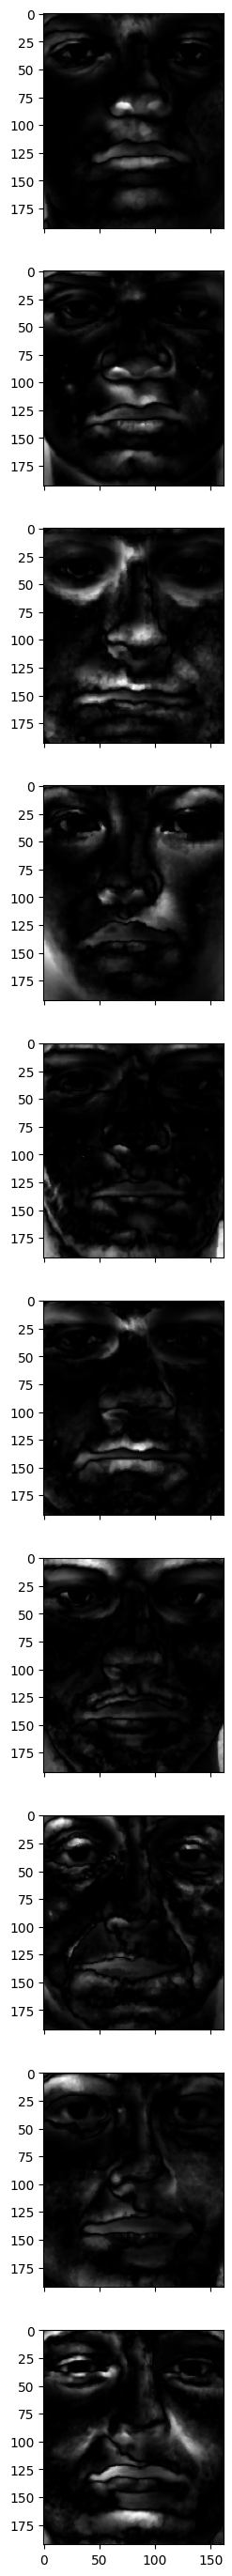

In [13]:
fig, axes = plt.subplots(10,1,sharex=True,sharey=True,figsize=(35,35))
neu_eig = neu_cov[:10] # take first 10 eigenfaces
for i in range(10):
    axes[i].imshow(neu_eig[i].reshape(193,162), cmap="gray")
plt.show()

In [44]:
neu_data = np.array(neu_cov).reshape(100,-1)
u, s, vh = np.linalg.svd(neu_data, full_matrices=False)

U:(100, 100)
S:(100,)
VH:(100, 31266)


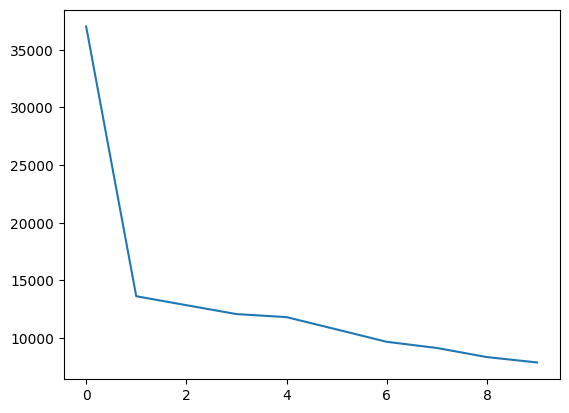

In [54]:
print("U:" + str(u.shape))
print("S:" + str(s.shape))
print("VH:" + str(vh.shape))
plt.plot(s[:10])
plt.show()

### I pick k = 1 since the elbow is around there since it is transition from signal to noise

## 1b Smiling!

In [16]:
rand_smikeys = [i.replace("a.jpg", "b.jpg") for i in rand_neukeys]
rand_smi = {k: v for k, v in smi_faces.items() if k in rand_smikeys}

In [17]:
smi_avg_list = [np.array(rand_smi[key].flatten().tolist()) for key in rand_smi]

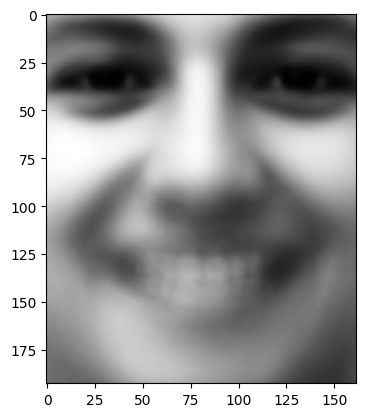

In [18]:
#get the average of the 100 faces
smi_avg_face = np.sum(smi_avg_list, axis=0)/100
show_avg_smi = smi_avg_face.reshape(193,162)
plt.imshow(show_avg_smi, cmap="gray")
plt.show()

In [19]:
#flatten the smile faces and subtract by the avg
flat_smi = [np.array(rand_smi[key].flatten().tolist()) for key in rand_smi]
flat_smi = [np.subtract(i, smi_avg_face) for i in flat_smi]

In [20]:
#calculate the covariance with sum neu.T*neu
smi_cov = [i*i.transpose()/100 for i in flat_smi]

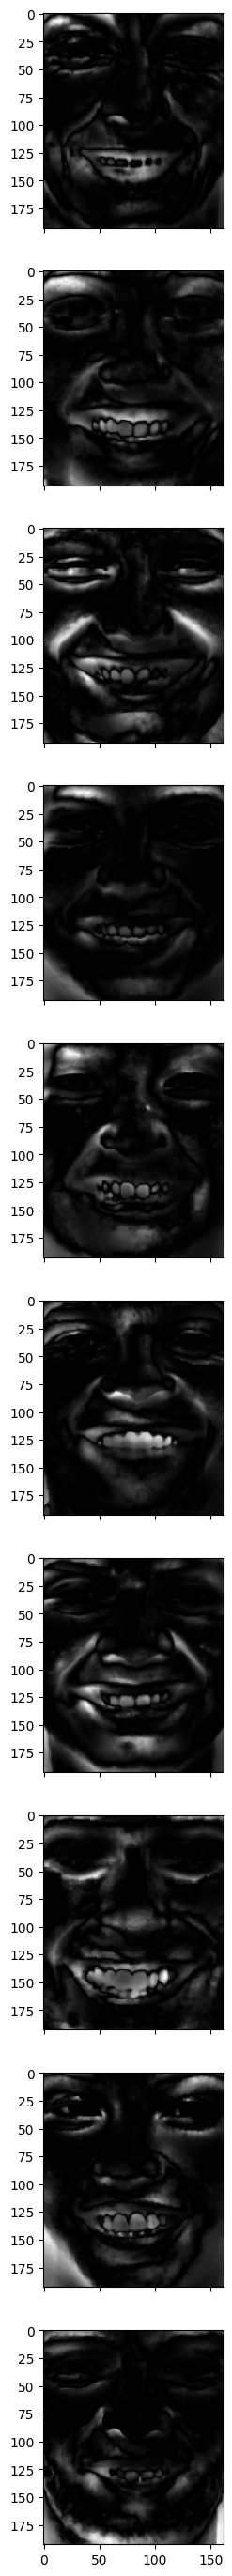

In [21]:
fig, axes = plt.subplots(10,1,sharex=True,sharey=True,figsize=(35,35))
smi_eig = smi_cov[:10] # take first 10 eigenfaces
for i in range(10):
    axes[i].imshow(smi_eig[i].reshape(193,162), cmap="gray")
plt.show()

In [50]:
smi_data = np.array(smi_cov).reshape(100,-1)
u1, s1, vh1 = np.linalg.svd(smi_data, full_matrices=False)

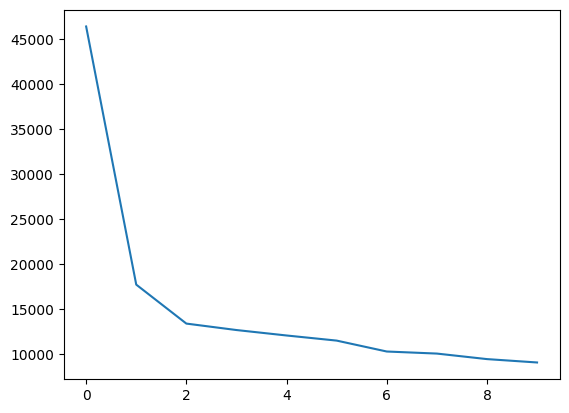

In [53]:
plt.plot(s1[:10])
plt.show()

### I pick k = 1 since the elbow is around there since it is transition from signal to noise

# Question 2

In [24]:
#image I want to reconstruct
recon_neuimg = neu_data[5]
print(recon_neuimg.shape)

(193, 162)


In [56]:
print(u.shape)
print(s.shape)
print(vh.shape)

(100, 100)
(100,)
(100, 31266)


In [57]:
neu_PCA_list = [1,2,3,4,5,10,20,30,50,100]
fig, axes = plt.subplots(len(neu_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
neu_recon = []
for k in neu_PCA_list:
    recon_img = avg_face.reshape(193,162) + np.dot(u[:,:k], np.dot(np.diag(s[:k]), vh[:k,:])).reshape(100,193,162)
    neu_recon.append(recon_img)

for i in range(len(neu_PCA_list)):
    axes[i]..imshow(neu[i].reshape(193,162), cmap="gray")
plt.show()